<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression" data-toc-modified-id="Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#Simple-Linear-Regression" data-toc-modified-id="Simple-Linear-Regression-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simple Linear Regression</a></span></li><li><span><a href="#Multi-Regression" data-toc-modified-id="Multi-Regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Multi Regression</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Accuracy</a></span></li></ul></li></ul></div>

# Regression

## Simple Linear Regression

Load the dataset:

In [2]:
import seaborn as sns
import pandas as pd
data = pd.read_csv('Fitbit2 (1).csv') 

In [3]:
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [4]:
data.columns

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')

Check the relations between them:

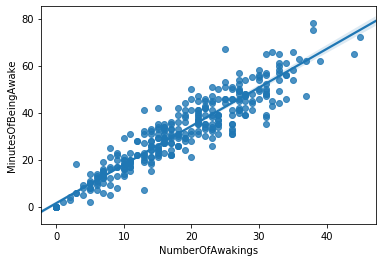

In [7]:
sns.regplot(x="NumberOfAwakings", y="MinutesOfBeingAwake", data=data)

#el regplot es un scatterplot pero te pinta la línea
#en este caso, si viéramos la correlación, sería positiva y sería un número muy alto

Here, we can see that as the number of awakenings increases, so does the number of minutes of being awake. This makes sense, given that if you wake up more times in the night, you will also likely be awake for more time (even if you wake up for a short time).

But what on average, how many more minutes are you awake if you wake up one more time during the night? 
In other words, we want to know what is the slope of this line. We can answer this question if we establish a linear mathematical equation/relation between the two variables:

[MinutesOfBeingAwake] = b0 + b1*[NumberOfAwakings]

In [8]:
from scipy import stats
X = data['NumberOfAwakings']
Y = data['MinutesOfBeingAwake']

Calculate bo and b1:

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

The slope is: 1.6405141436199793
The intercept is: 1.4381033523783202


## Multi Regression

Y is still the same, but we have added additional X’s to our equation. We will use additional columns from the dataset to include as the predictor variables (hence multiple linear regression). Please note that for now we are only using the columns that have numerical values.

In [12]:
import statsmodels.api as sm
X_m = data[["NumberOfAwakings", "Calorie burned", "Steps", "Distance"]]
model = sm.OLS(Y,X_m)
results = model.fit()
predictions = results.predict(X_m)

In [13]:
predictions

0      37.435004
1      36.855760
2      42.665195
3      35.026934
4      72.644696
5      52.317805
6      20.176266
7      27.086722
8      32.072313
9      19.586759
10     14.628776
11     45.671189
12     36.548510
13     44.615179
14     43.089632
15     41.518131
16     32.764449
17      0.555439
18     46.440464
19     28.570402
20     53.862838
21     43.446166
22     44.081321
23     56.419243
24     44.689897
25     57.589439
26     49.194594
27     28.155999
28     57.242914
29     47.278855
         ...    
337    40.926059
338    17.603295
339    36.518391
340    44.916569
341    36.240494
342    53.126615
343    32.142402
344    36.083176
345    42.672407
346     1.024167
347    23.947241
348     2.610458
349    30.150401
350    30.512249
351    65.284359
352    46.396734
353    51.878908
354    24.154092
355    18.726256
356    47.017780
357    59.484609
358    17.189088
359    45.249190
360    34.509712
361    39.318597
362    31.984711
363    15.332903
364    27.5650

In [14]:
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     MinutesOfBeingAwake   R-squared:                       0.972
Model:                             OLS   Adj. R-squared:                  0.972
Method:                  Least Squares   F-statistic:                     3156.
Date:                 Thu, 05 Sep 2019   Prob (F-statistic):          1.88e-280
Time:                         20:46:13   Log-Likelihood:                -1153.9
No. Observations:                  367   AIC:                             2316.
Df Residuals:                      363   BIC:                             2331.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
NumberOfAwakings     1.6300   

## Logistic Regression

Let's look at an example of linear interpolation.

In [18]:
from sklearn.linear_model import LogisticRegression
churnData = pd.read_csv('churn.csv')
numericData = churnData[['tenure','SeniorCitizen','MonthlyCharges']]
Y_r = pd.DataFrame(data=churnData, columns=['Churn'])

In [21]:
Y_r.head()

#si la persona se va de la compañía o no

,Churn
0,No
1,No
2,Yes
3,No
4,Yes


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

target = churnData["Churn"]
log = LogisticRegression()
classification = log.fit(numericData, target)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
classification.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [26]:
classification.classes_

#esto te dice las posibles salidas, que como estamos haciendo regresión logística, es categórico

array(['No', 'Yes'], dtype=object)

In [27]:
table = [[1,0,45], [2,0,50], [1,1,23]]
headers = numericData.columns

new_clients =  pd.DataFrame(table, columns=headers)
new_clients

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,45
1,2,0,50
2,1,1,23


In [30]:
classification.predict(new_clients)

#ea, no se van a dar de baja

array(['No', 'No', 'No'], dtype=object)

## Accuracy

In [34]:
pred = [intercept + slope * x for x in X]

In [35]:
residuo = [Y[i]-pred[i] for i in range(len(Y))]

In [37]:
import numpy as np

RMSE = np.sqrt(np.mean([j**2 for j in residuo]))

In [38]:
RMSE

5.678290611710417

In [39]:
# R Square

from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(Y, predictions))
r2_score(Y, predictions)

31.51090708999336


0.9080905610495728

In [ ]:
#Eso es lo mismo que decir que soy capaz de rescatar el 90% de la varianza de los datos
#A partir del 80% aprox es accurate